## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import norm
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [18]:
df= pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [19]:
df.info() # studying the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [20]:
df.nunique() #identifying the count of unique values in each column

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [21]:
df_conv = []
df_conv = df.query('converted == "1"')
df_ = pd.DataFrame(df_conv)
x = df_["user_id"].nunique()
y = df["user_id"].nunique()
p = float(x)/float(y)
p
#identifying the proportion of converted users

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [22]:
df_newpage = df.query('landing_page == "new_page"')
df_2 = df_newpage.query('group == "treatment"')
df_2.nunique()
#identifying the number of times new_page and treatment line up

user_id         145310
timestamp       145311
group                1
landing_page         1
converted            2
dtype: int64

In [23]:
df_notnew = df.query('landing_page != "new_page"')
df_3 = df_notnew.query('group == "treatment"')
df_3.nunique()
#identifying unqique instances where new_page does not line up with treatment

user_id         1965
timestamp       1965
group              1
landing_page       1
converted          2
dtype: int64

In [24]:
df_not4new = df.query('landing_page == "new_page"')
df_43 = df_not4new.query('group != "treatment"')
df_43.nunique()

user_id         1928
timestamp       1928
group              1
landing_page       1
converted          2
dtype: int64

In [25]:
df_nott = df.query('landing_page == "old_page"')

df_4 = df_nott.query('group != "control"')
df_4.nunique()
#identifying unique instances where old_page does not line up with control

user_id         1965
timestamp       1965
group              1
landing_page       1
converted          2
dtype: int64

In [26]:
Not_same = df_3['user_id'].count() + df_43['user_id'].count() 
Not_same
# identifying when new_page and treatment don't line up

3893

f. Do any of the rows have missing values?

In [27]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [28]:
df_c = df.query('landing_page!= "old_page"')  
df_cb = df_c.query('group == "control"')
df_cb.nunique()
#creating new dataset using query function

user_id         1928
timestamp       1928
group              1
landing_page       1
converted          2
dtype: int64

In [29]:
df_z= df_cb.groupby(["landing_page","group"]).count()
df_z
#using groupby function to check values

,,user_id,timestamp,converted
landing_page,group,,,
new_page,control,1928,1928,1928


In [30]:
df_uv = df.query('landing_page != "new_page"') 
df_vu = df_uv.query('group == "treatment"')
df_vu.count()
#creating new dataset using query function

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [31]:
df_u= df_vu.groupby(["landing_page","group"]).count()
df_u
#using groupby function to check values

,,user_id,timestamp,converted
landing_page,group,,,
old_page,treatment,1965,1965,1965


In [32]:
df_l = df_vu.append(df_cb) #creating a new dataset

In [33]:
df_l.groupby(["landing_page","group"]).count() #verifying the values in the new dataset

,,user_id,timestamp,converted
landing_page,group,,,
new_page,control,1928,1928,1928
old_page,treatment,1965,1965,1965


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [34]:
df.drop(df.query("group =='treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group =='control' and landing_page == 'new_page'").index, inplace=True)
# dropping values that match conditions in the query function

In [35]:
df.info() #checking the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [36]:
df.to_csv('ab.csv',index=False) #creating a new dataset file

In [37]:
df2 = pd.read_csv('ab.csv') #reading the new dataset file

In [38]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') ==(df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [39]:
df2.nunique() #checking the number of unqiue ids

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [40]:
df2[df2.duplicated(['user_id'], keep=False)] #identifying the repeated user_id


,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [41]:
df2[df2.duplicated(['user_id'], keep=False)] #displaying the row information for the repeated user_id

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [42]:
df2=df2.drop(df2.index[1876]) #removing one row of the repeating user_id

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [43]:
df_con1 = df2.query("converted=='1'") 
x_ = df_con1["user_id"].count()
x_
#count of converted values

34753

In [44]:
y_ = df2["user_id"].count()
#total count of individuals

In [45]:
prob = x_/y_
prob
#probability of individual converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [46]:
df_con_control = df_con1.query('group =="control"')
x_control = df_con_control["user_id"].count()
x_control
#count of converted users in control group

17489

In [47]:
df_control = df2.query('group=="control"')
y_control = df_control["user_id"].count()
#count of users in control group

In [48]:
prob_control = x_control/y_control
prob_control
#probability of converted with the group being control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [49]:
df_con_treat = df_con1.query('group =="treatment"')
x_treat = df_con_treat["user_id"].count()
x_treat
#count of converted users in treatment group

17264

In [50]:
df_treat = df2.query('group=="treatment"')
y_treat = df_treat["user_id"].count()
#count of users in treatment group

In [51]:
prob_treat = x_treat/y_treat
prob_treat
#probability of converted with the group being treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [52]:
df_newpage = df2.query('landing_page =="new_page"')
x_newpage = df_newpage["user_id"].count()
#count of users with new_page

In [53]:
y_newpage = df2["user_id"].count()
prob_newpage = x_newpage/y_newpage
prob_newpage
#probability of individual with new_page

0.50006194422266881

In [54]:
df_new_conv = df_newpage.query('converted == "1"')
x_new_conv = df_new_conv["user_id"].count()
#count of converted users with new_page

In [55]:
prob_new_conv = x_new_conv/x_
prob_new_conv 
#probability of conversion with new_page

0.49676286939257042

In [57]:
df_oldpage = df2.query('landing_page =="old_page"')
x_oldpage = df_oldpage["user_id"].count()
df_old_conv = df_oldpage.query('converted == "1"')
x_old_conv = df_old_conv["user_id"].count()

In [58]:
prob_old_conv = x_old_conv/x_oldpage
prob_old_conv
#probability of conversion with old_page

0.1203863045004612

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The probability of control group being converted is 0.120 while the probability of treatment group being converted is 0.118. So we find the values to be very close with control group slightly higher than treatment group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null = pold >= pnew 
Alternate = pold < pnew 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [59]:
pnew = df2['converted'].mean()
print(pnew) #creating the mean converted values as pnew

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [60]:
pold = df2['converted'].mean()
print(pold) #creating the mean converted values as pnew

0.119597087245


c. What is $n_{new}$?

In [61]:
df_newlen = len(df2.query("group =='treatment'"))
df_newlen 

145310

d. What is $n_{old}$?

In [62]:
df_oldlen = len(df2.query("group =='control'"))
df_oldlen

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [63]:
new_page_converted = np.random.choice([1,0], size=df_newlen, p=[pnew,(1-pnew)])
#checked values using (len(new_page_converted))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [64]:
old_page_converted = np.random.choice([1,0], size=df_oldlen, p=[pold,(1-pold)])
#checked values using (len(old_page_converted))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [65]:
new_page_converted = new_page_converted[:145274]
#truncating the excess values in new_page due to the difference in sizes between new_page_converted and old_page_converted

In [79]:
pdiff = (new_page_converted.mean()) - (old_page_converted.mean())
#check value by print(pdiff)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [80]:
p_diffs = []

In [81]:
#simualting 10,000 values  and storing in p_diffs
for i in range(1000):
    new_page_converted = np.random.choice([1,0], size=df_newlen, p=[pnew,(1-pnew)]).mean()
    old_page_converted = np.random.choice([1,0], size=df_oldlen, p=[pold,(1-pold)]).mean()
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'plot of simualted p_diffs')

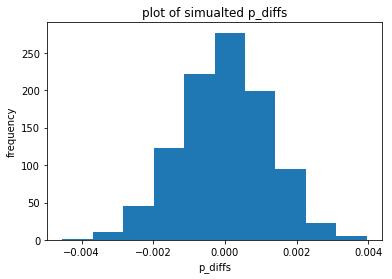

In [82]:
#plotting histogram
plt.hist(p_diffs)
plt.xlabel("p_diffs")
plt.ylabel("frequency")
plt.title("plot of simualted p_diffs")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
#calculating differnece from orginal dataset
act_diff = df[df["group"]=='treatment']["converted"].mean() - df[df["group"]=='control']["converted"].mean()
act_diff

-0.0015790565976871451

In [84]:
p_diffs = np.array(p_diffs)

In [85]:
#proportion of p_diffs greater than act_diffs
(act_diff < p_diffs).mean()

0.90100000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1.The p value computed is the probability of the given statistical model. 
2. p-value greater than 0.05, show weak evidence against the null hypothesis. So  we fail to reject the null hypothesis.
3. Since we fail to reject the null hypothesis, we can compute that the both the pages perform the same. The numbers however show that old page peforms better.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [73]:
import statsmodels.api as sm

#number of conversions for new and old page
old_conversions = sum(df2.query("group == 'control'")['converted'])
new_conversions = sum(df2.query("group == 'treatment'")['converted'])
#number of rows in old and new page
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
print(old_conversions,new_conversions)
print(n_old,n_new)


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264
145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [77]:
z_score, p_value = sm.stats.proportions_ztest([old_conversions, new_conversions], [n_old, n_new], alternative = 'smaller')
print(z_score)
print(p_value)
#proportions_ztest returns the z_score, p_value

1.31092419842
0.905058312759


In [78]:


print(norm.cdf(z_score)) #value to test significance



print(norm.ppf(1-(0.05))) # critical value for one sided test


0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

1. Null hypothesis is accepted as z score of 1.310 is less than the critical value of 1.644.
2. The conversion rates are close for two pages. This answer is the same as the results from parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing Logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [118]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

# get_dummies function gives us 1s and 0s

In [130]:
df['ab_page'] = pd.Series(np.zeros(len(df)), index=df.index)

In [134]:
index_to_change = df[df['group']=='treatment'].index


In [135]:
df.set_value(index=index_to_change, col='ab_page', value=1)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1.0,1,0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1.0,1,0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,0,1,1.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,0,1,1.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1.0,1,0,0.0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1.0,1,0,0.0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1.0,0,1,1.0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1.0,1,0,0.0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1.0,0,1,1.0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1.0,0,1,1.0


In [136]:
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1.0,1,0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1.0,1,0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,0,1,1.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,0,1,1.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1.0,1,0,0.0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [139]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])
#logistic regression to predict converted column using intercept and treatment columns

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [140]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Apr 2018   Pseudo R-squ.:               8.085e-06
Time:                        23:23:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

Ans: The p value of 0.190 obtained from ab_page is higher than the p-value of 0.90 in part 2. This because in part 2 we use a one-tail test to check if old page is better than new page while in part 3 we use a two tailed test
 to see if conversion changes with the type of page we receive. The reason for difference in p values is the nature of test and conditions.



**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Our hypothesis here is:
H0 = pold -pnew =0
H1 = pold -pnew != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

1. Other factors should also be taken into account in this analysis. Factors such as new or returning candidates, test taking methods or prior experience will also influence test results.
2. Addition of more factors will make it difficult to determine relationships. There might also be factors with stronger relationship that are missing from our analysis. So all factors cannot be taken into account.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [141]:
countries = pd.read_csv('./countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [197]:
df_dummy = pd.get_dummies(data=countries, columns=['country'])

# Performing join
newset = df_dummy.merge(df, on='user_id') # df.join is depricated AFAIK

# Sorting columns
newset = newset[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types
newset[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
newset[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

newset.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [198]:
# Create logit_countries object
logit_countries = sm.Logit(newset['converted'], 
                           newset[['country_UK', 'country_US', 'intercept']])

# Fit
result_new = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [199]:
# Show results
result_new.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.0880
Date:               2018-04-18 00:05 BIC:              212812.8269
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.19834    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5176  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [200]:
# Create logit_countries object
logit2_countries = sm.Logit(newset['converted'], 
                           newset[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fit
result_final = logit2_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [201]:
# Show results
result_final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2018-04-18 00:05 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
==================================================================

"""

In [202]:
np.exp(results.params) #np.exp is used to calculate the exponential of all elements in the input array, .params gives the linear coefficients that minimize the least value criterion

CA    0.130350
US    0.135778
dtype: float64

In [203]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions

1. When adding all values together  we find that the p-value for all features is increased. The z score is also large which is interesting.

Final conclusion:
1. From all tests conducted we accept null hypothesis and reject the alternate hypothesis.
2. The conversion rates are fairly close for US and UK. The users have roughly 50% chance to receive new page or old page.
3. I also acknowledge the presence of new factors that can provide further information on the relationship between variables.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.